In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
workload = pd.read_excel(r"C:\Users\USER\OneDrive\Desktop\jupyter\sku_2024_2\data\LOT 물량.xlsx")
# SET2: 시계열 설비데이터
operation = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\jupyter\sku_2024_2\data\PRODUCTION_TREND.csv", encoding='CP949')
# SET3: CCM 검사결과
ccm = pd.read_excel(r"C:\Users\USER\OneDrive\Desktop\jupyter\sku_2024_2\data\CCM 측정값.xlsx")

In [3]:
workload.head()

,EXT1_QTY(투입중량 (KG)),EXT2_QTY (액량 (LITER)),PRODT_ORDER_NO,JOB_CD,PROCESS_CD,단위중량,염색 가동 길이
0,245.6,4000,F2111300008,F12-1203,F12-1203,590,120.0
1,71.4,600,F2111300012,F12-1203,F12-1203,445,123.0
2,98.3,4000,F2111300020,F12-1203,F12-1203,0,460.0
3,97.0,4000,F2111300021,F12-1203,F12-1203,0,452.0
4,40.6,600,F2111300027,F12-1203,F12-1203,445,86.0


In [4]:
operation.head(11)

,LOT_NO,WC_CD,WC_CNT,SEQ_NO,PGM_ID,RESOURCE_CD,CR_TEMP,TRD_TEMP_SP,TRD_TEMP_PV,TRD_SPEED1,TRD_SPEED2,TRD_SPEED3,TRD_SPEED4,INSRT_DT,PRODUCTION_RESULT_iD
0,F2112280005,F12-1203,1,1,B9700,FCM04,30,30.0,14.5,0,0,0,0,2022-01-03,NaN
1,F2112280005,F12-1203,1,2,B9700,FCM04,30,30.0,16.1,0,0,0,0,2022-01-03,NaN
2,F2112280005,F12-1203,1,3,B9700,FCM04,30,30.0,19.6,111,1,112,1,2022-01-03,NaN
3,F2112280005,F12-1203,1,4,B9700,FCM04,30,30.0,20.0,111,1,112,1,2022-01-03,NaN
4,F2112280005,F12-1203,1,5,B9700,FCM04,30,30.0,19.9,111,1,112,1,2022-01-03,NaN
5,F2112280005,F12-1203,1,6,B9700,FCM04,30,30.0,19.9,111,1,112,1,2022-01-03,NaN
6,F2112280005,F12-1203,1,7,B9700,FCM04,50,30.0,19.8,111,1,112,1,2022-01-03,NaN
7,F2112280005,F12-1203,1,8,B9700,FCM04,50,30.0,19.8,111,1,112,1,2022-01-03,NaN
8,F2112280005,F12-1203,1,9,B9700,FCM04,60,31.1,18.0,111,1,112,1,2022-01-03,NaN
9,F2112280005,F12-1203,1,10,B9700,FCM04,60,31.1,23.0,87,2,86,2,2022-01-03,NaN


In [5]:
ccm.head()

,lot_no,seq,oper_id,염색 색차 DL,염색 색차 DA,염색 색차 DB,염색 색차 DC,염색 색차 DH,염색 색차 DE
0,F2002240067,0,염색,1.402431,-0.079870,0.255513,0.063653,-0.260028,1.427754
1,F2003120058,0,염색,-0.043186,-0.021964,0.614762,0.032673,-0.614286,0.616669
2,F2006160123,0,원단검사,12.724530,-1.963228,-1.810259,1.940723,-1.834361,13.001730
3,F2009030093,0,원단검사,0.243153,0.251606,-3.862172,3.830362,-0.554988,3.877990
4,F2009030093,0,원단검사,0.673786,0.199348,-3.894216,3.854515,-0.589382,3.957100


In [6]:
workload = workload[['PRODT_ORDER_NO', 'JOB_CD', 'EXT1_QTY(투입중량 (KG))', 'EXT2_QTY (액량 (LITER))', '단위중량', '염색 가동 길이']]
workload.columns = ['LOT번호', '공정코드', '투입중량(kg)', '투입액량(L)', '단위중량(kg)', '염색길이(m)']

In [7]:
workload.head()

,LOT번호,공정코드,투입중량(kg),투입액량(L),단위중량(kg),염색길이(m)
0,F2111300008,F12-1203,245.6,4000,590,120.0
1,F2111300012,F12-1203,71.4,600,445,123.0
2,F2111300020,F12-1203,98.3,4000,0,460.0
3,F2111300021,F12-1203,97.0,4000,0,452.0
4,F2111300027,F12-1203,40.6,600,445,86.0


In [8]:
operation = operation[['LOT_NO', 'WC_CD', 'RESOURCE_CD', 'INSRT_DT', 'SEQ_NO', 'CR_TEMP', 'TRD_TEMP_SP', 'TRD_TEMP_PV', 'TRD_SPEED1', 'TRD_SPEED2', 'TRD_SPEED3', 'TRD_SPEED4']]
operation.columns = ['LOT번호', '공정코드', '설비번호', '공정일시', '공정진행시간', '목표온도', '지시온도', '진행온도', '포속1', '포속2', '포속3', '포속4']

In [9]:
operation.isnull().sum()

LOT번호     0
공정코드      0
설비번호      0
공정일시      0
공정진행시간    0
목표온도      0
지시온도      0
진행온도      0
포속1       0
포속2       0
포속3       0
포속4       0
dtype: int64

In [10]:
ccm = ccm[['lot_no', 'seq', 'oper_id', '염색 색차 DE']]
ccm.columns = ['LOT번호', '검사차수', '작업명', '염색색차 DE']

In [11]:
ccm.head()

,LOT번호,검사차수,작업명,염색색차 DE
0,F2002240067,0,염색,1.427754
1,F2003120058,0,염색,0.616669
2,F2006160123,0,원단검사,13.001730
3,F2009030093,0,원단검사,3.877990
4,F2009030093,0,원단검사,3.957100


In [12]:
ccm['LOT번호'] = ccm['LOT번호'].str.capitalize()
# 재확인 – 소문자로 시작하는 데이터 개수 확인
ccm['LOT번호'].str.islower().sum()

0

In [13]:
workload2 = workload[~workload.duplicated(keep='first')]
# 인덱스번호 리셋
workload2.reset_index(drop=True, inplace=True)
# 중복데이터 개수 재확인
workload2.duplicated().sum()

0

In [14]:
# LOT번호+공정진행시간 순으로 데이터 재정렬
operation.sort_values(by=['LOT번호', '공정진행시간'], ascending=True, inplace=True, ignore_index=True)

In [15]:
# 중복데이터 한 개씩만 남기고 모두 삭제
operation2 = operation[~operation.duplicated(keep='first')]
# 인덱스번호 리셋
operation2.reset_index(drop=True, inplace=True)
# 중복데이터 개수 재확인
operation2.duplicated().sum()

0

In [16]:
# 중복데이터 한 개씩만 남기고 모두 삭제
ccm2 = ccm[~ccm.duplicated(keep='first')]
# 인덱스번호 리셋
ccm2.reset_index(drop=True, inplace=True)
# 중복데이터 개수 재확인
ccm2.duplicated().sum()

0

In [17]:
# LOT번호순으로 데이터 재정렬
workload2.sort_values(by='LOT번호', ascending=True, ignore_index=True, inplace=True)
# 데이터 유일성을 벗어나는 데이터 개수 확인
(workload2.groupby('LOT번호').size() > 1).sum()
# 비유일성 데이터 내용 확인
workload2[workload2.duplicated(subset='LOT번호', keep=False)]
# 비유일성 데이터 삭제
workload3 = workload2.drop([1647, 1939], axis=0) #index=1647, 1939 위치의 행(row) 삭제
# 인덱스번호 리셋
workload3.reset_index(drop=True, inplace=True)
# LOT번호 기준으로 데이터 유일성 재확인
(workload3.groupby('LOT번호').size() > 1).sum()

0

In [18]:
# LOT번호+공정진행시간 순으로 데이터 재정렬
operation2.sort_values(by=['LOT번호', '공정진행시간'], ascending=True, inplace=True, ignore_index=True)
# 중복데이터 한 개씩만 남기고 모두 삭제
operation3 = operation2[~operation2.duplicated(subset=['LOT번호', '공정코드', '공정진행시간'], keep='last')]
# 인덱스번호 리셋
operation3.reset_index(drop=True, inplace=True)
# 데이터 유일성 재확인
(operation3.groupby(['LOT번호', '공정코드', '공정진행시간']).size() >1).sum()

0

In [19]:
# LOT번호+검사차수 순으로 데이터 재정렬
ccm2.sort_values(by=['LOT번호', '검사차수'], ascending=True, ignore_index=True, inplace=True)
# LOT번호 기준으로 가장 마지막 값(=마지막 검사차수값)만 추출
ccm3 = ccm2.groupby(['LOT번호']).last()
# groupby를 통해 인덱스가 된 LOT번호를 다시 컬럼명으로 변경
ccm3.reset_index(drop=False, inplace=True)
# 추출 데이터 확인
ccm3

,LOT번호,검사차수,작업명,염색색차 DE
0,F2002240067,0,염색,1.427754
1,F2003120058,0,염색,0.616669
2,F2006160123,0,원단검사,13.001730
3,F2009030093,0,원단검사,3.957100
4,F2009050181,0,염색,1.034338
...,...,...,...,...
422,F2209080008,1,염색,0.323110
423,F2209130036,0,원단검사,4.567289
424,F2209130097,0,원단검사,0.784885
425,F2209130098,0,원단검사,0.323461


In [20]:
ccm3.duplicated(subset=['LOT번호', '검사차수']).sum()

0

In [21]:
# 데이터프레임 복사
workload4 = workload3.copy()
# 염색길이 대비 투입중량 파생변수 생성
workload4['투입중량/길이'] = workload4['투입중량(kg)'] / workload4['염색길이(m)']
# 투입액량 대비 투입중량 파생변수 생성
workload4['투입중량/액량'] = workload4['투입중량(kg)'] / workload4['투입액량(L)']

In [22]:
workload4.head()

,LOT번호,공정코드,투입중량(kg),투입액량(L),단위중량(kg),염색길이(m),투입중량/길이,투입중량/액량
0,F2111300008,F12-1203,245.6,4000,590,120.0,2.046667,0.061400
1,F2111300012,F12-1203,71.4,600,445,123.0,0.580488,0.119000
2,F2111300020,F12-1203,98.3,4000,0,460.0,0.213696,0.024575
3,F2111300021,F12-1203,97.0,4000,0,452.0,0.214602,0.024250
4,F2111300027,F12-1203,40.6,600,445,86.0,0.472093,0.067667


In [23]:
# 결과를 저장할 새 데이터프레임 생성
operation4 = pd.DataFrame()

# 각 LOT번호 그룹을 룹핑하면서 공정진행시간% 계산
for name, group in operation3.groupby('LOT번호'):
    group.sort_values(by=['공정진행시간'], ascending=True, inplace=True, ignore_index=True)

    # 전체 공정시간 대비 진행시간(%)
    group['공정진행시간(%)'] = round(group['공정진행시간'] / group['공정진행시간'].max() * 100, 2)

    # 결과 저장
    operation4 = pd.concat([operation4, group], ignore_index=True)

# 인덱스 리셋 (이미 ignore_index=True로 설정하였으므로 필요 없음)


In [24]:
operation4 = operation4[['LOT번호', '공정코드', '설비번호', '공정진행시간(%)',
'목표온도', '지시온도', '진행온도', '포속1', '포속2', '포속3', '포속4']]

In [25]:
df = ccm3.merge(workload4, how='inner', on='LOT번호')
#inner: 양쪽에 동시에 존재하는 LOT번호 기준으로 결합
# 설비데이터(시계열) + 그 외 데이터(배치성) 결합 - 'LOT번호', '공정코드' 기준
df2 = df.merge(operation4, how='inner', on=['LOT번호', '공정코드'])
# 결합 결과 확인
df2.head()

,LOT번호,검사차수,작업명,염색색차 DE,공정코드,투입중량(kg),투입액량(L),단위중량(kg),염색길이(m),투입중량/길이,투입중량/액량,설비번호,공정진행시간(%),목표온도,지시온도,진행온도,포속1,포속2,포속3,포속4
0,F2201280039,0,원단검사,0.753096,F12-1203,44.6,1000,324,41.0,1.087805,0.0446,FCM08,0.19,30,30.0,10.9,0,0,0,0
1,F2201280039,0,원단검사,0.753096,F12-1203,44.6,1000,324,41.0,1.087805,0.0446,FCM08,0.39,30,30.0,10.3,16,1,16,1
2,F2201280039,0,원단검사,0.753096,F12-1203,44.6,1000,324,41.0,1.087805,0.0446,FCM08,0.58,30,30.0,10.3,68,2,16,1
3,F2201280039,0,원단검사,0.753096,F12-1203,44.6,1000,324,41.0,1.087805,0.0446,FCM08,0.77,30,30.0,10.2,69,3,138,2
4,F2201280039,0,원단검사,0.753096,F12-1203,44.6,1000,324,41.0,1.087805,0.0446,FCM08,0.97,30,30.0,10.8,69,3,138,2


In [26]:
print('SET1 데이터 크기: {}'.format(workload4.shape))
print('SET2 데이터 크기: {}'.format(operation4.shape))
print('SET3 데이터 크기: {}'.format(ccm3.shape))
print('\nSET1+SET3 데이터 크기: {}'.format(df.shape))
print('SET1+SET2+SET3 데이터 크기: {}'.format(df2.shape))

SET1 데이터 크기: (2127, 8)
SET2 데이터 크기: (2099361, 11)
SET3 데이터 크기: (427, 4)

SET1+SET3 데이터 크기: (127, 11)
SET1+SET2+SET3 데이터 크기: (34410, 20)


In [27]:
# 변수 순서 변경
df2 = df2[['LOT번호', '검사차수', '작업명', '공정코드', '설비번호',
'단위중량(kg)', '투입중량(kg)', '투입액량(L)', '염색길이(m)', '투입중량/길이', '투입중량/액량',
'공정진행시간(%)', '목표온도', '지시온도', '진행온도', '포속1', '포속2', '포속3', '포속4',
'염색색차 DE']]

In [28]:
df3 = df2[df2['단위중량(kg)'] >0]
df3.reset_index(drop=True, inplace=True)
# 데이터 크기 변화 확인

In [29]:
# 염색길이 이상치에 해당하는 데이터 모두 제거
df3 = df3[df3['염색길이(m)'] >1]
df3.reset_index(drop=True, inplace=True)
# 데이터 크기 변화 확인
print('이상치 제거 후 데이터 크기: {}'.format(df3.shape))

이상치 제거 후 데이터 크기: (32608, 20)


In [31]:
df3.to_csv(r"C:\Users\USER\OneDrive\Desktop\jupyter\sku_2024_2\df3.csv")

In [30]:
#보류
##df4 = df3.drop(['투입액량(L)', '목표온도'], axis=1)

## df 로드

In [22]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df3 = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\jupyter\sku_2024_2\df3.csv")

In [138]:
df3['투입액량(L)'].value_counts()

투입액량(L)
2000    11945
1000     8952
4000     8012
600      3699
Name: count, dtype: int64

In [139]:
df5 = df3[['단위중량(kg)', '투입중량(kg)', '염색길이(m)', '투입중량/길이', '투입중량/액량',
'공정진행시간(%)', '진행온도','지시온도', '포속1', '포속2', '포속3', '포속4']]

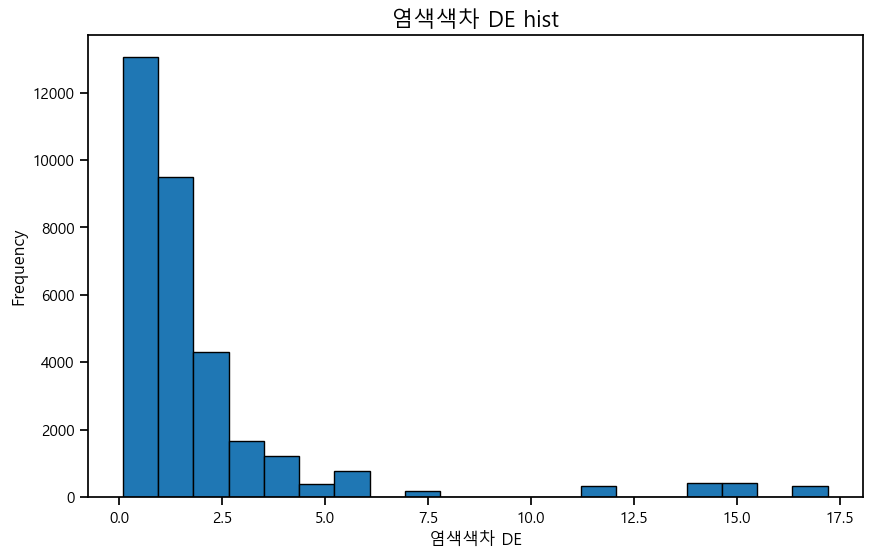

In [38]:
import matplotlib.pyplot as plt

# Histogram for a single variable
dfa = df3['염색색차 DE']
plt.figure(figsize=(10, 6))
plt.hist(dfa, bins=20, edgecolor='black')
plt.title("염색색차 DE hist", fontsize=16)
plt.xlabel("염색색차 DE")
plt.ylabel("Frequency")
plt.show()


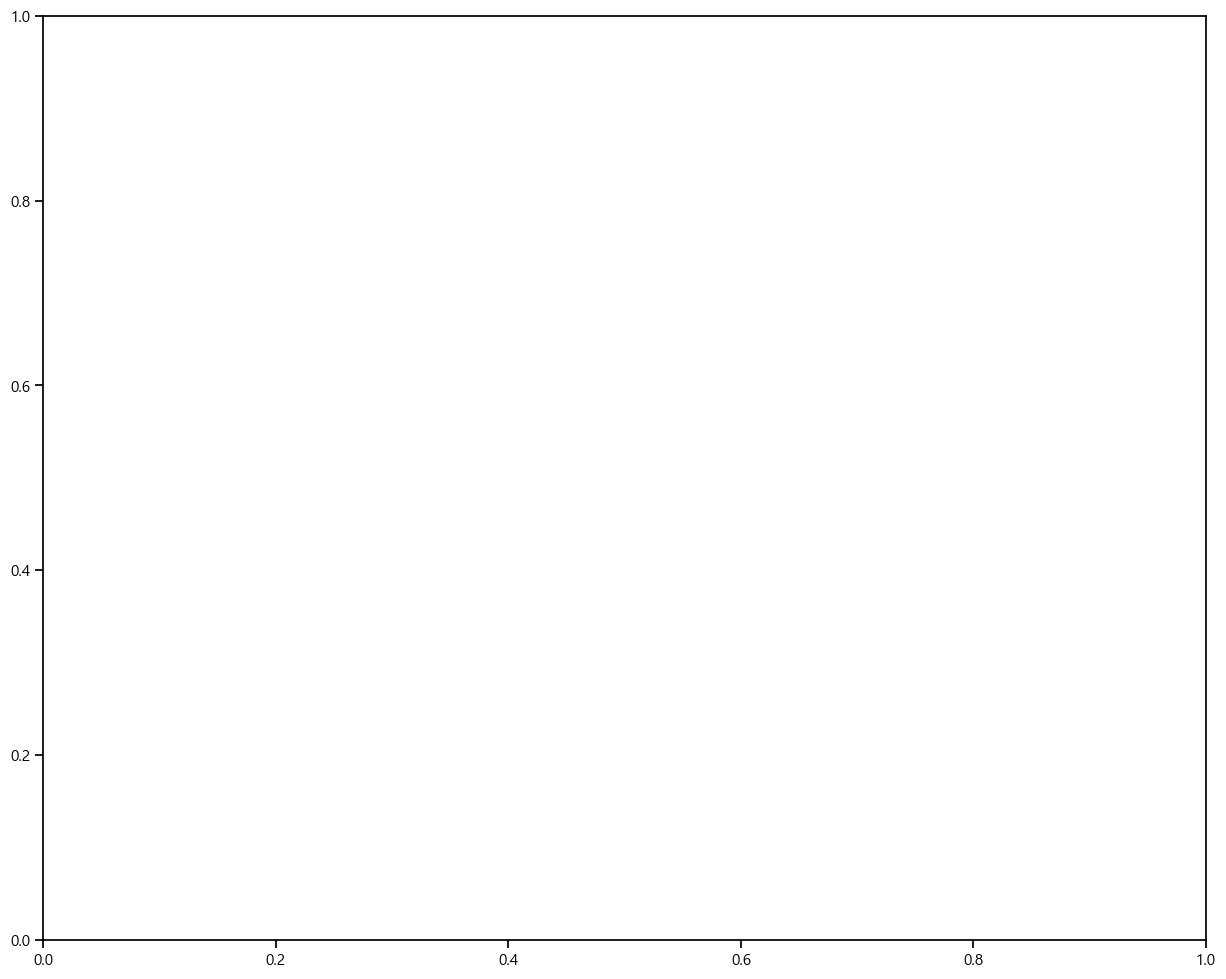

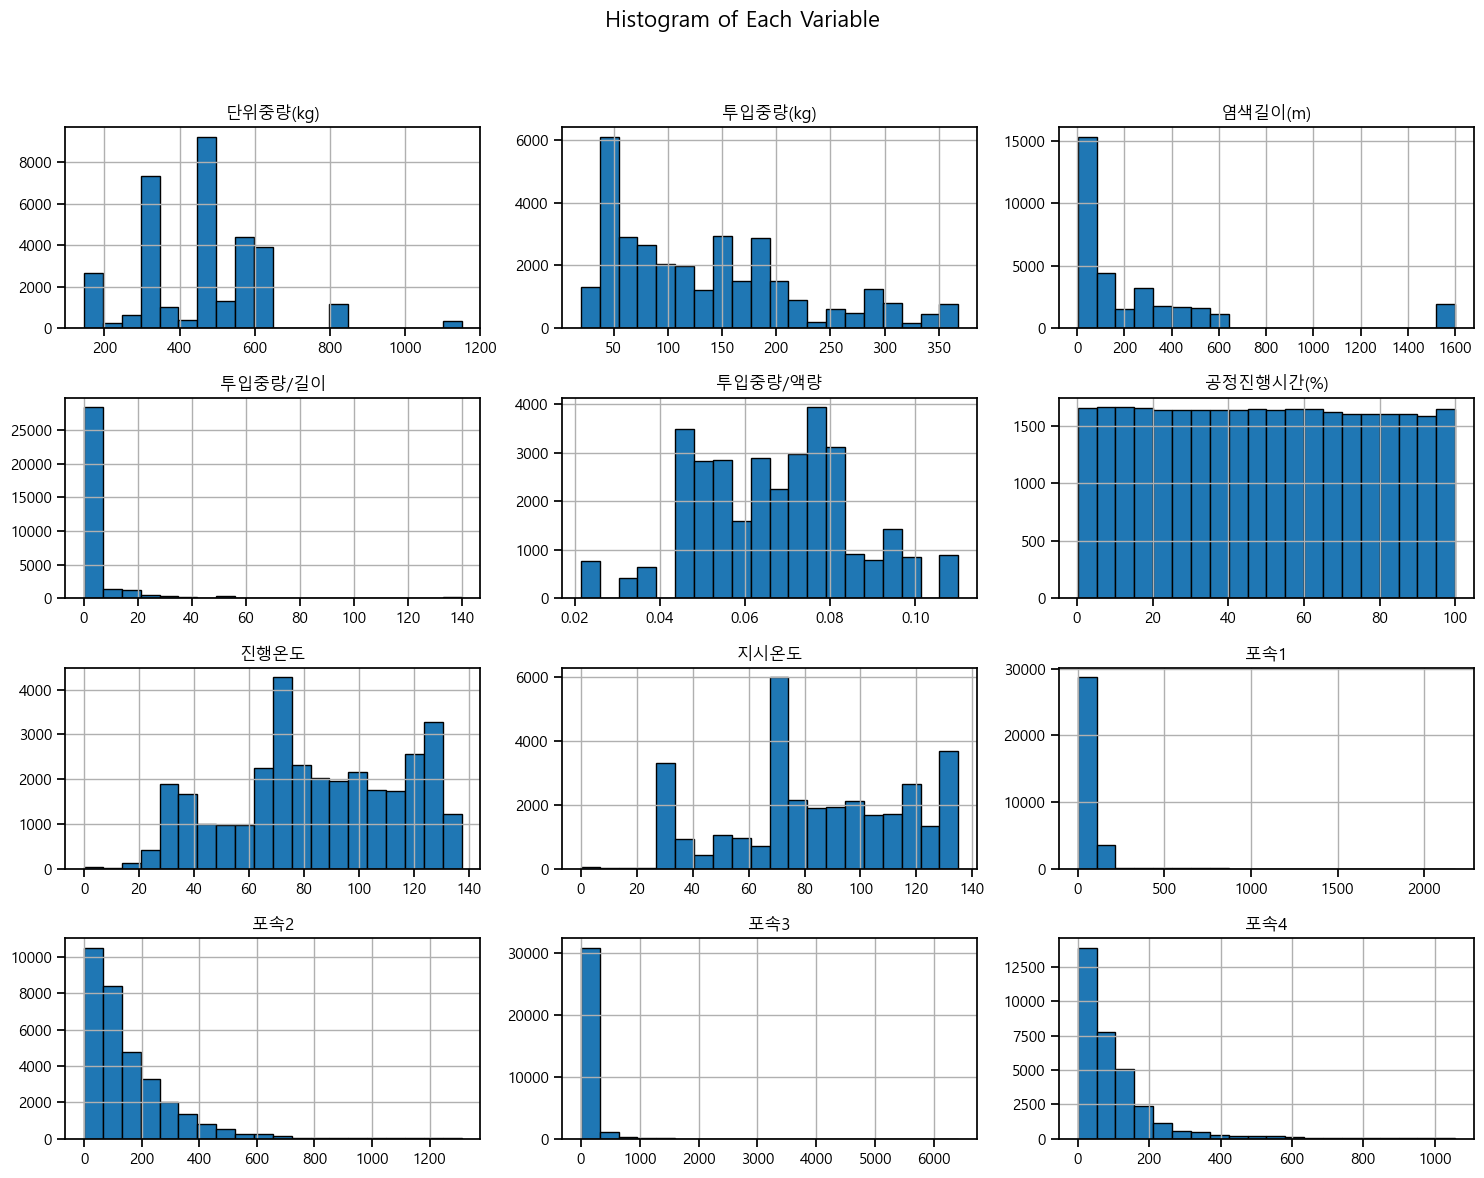

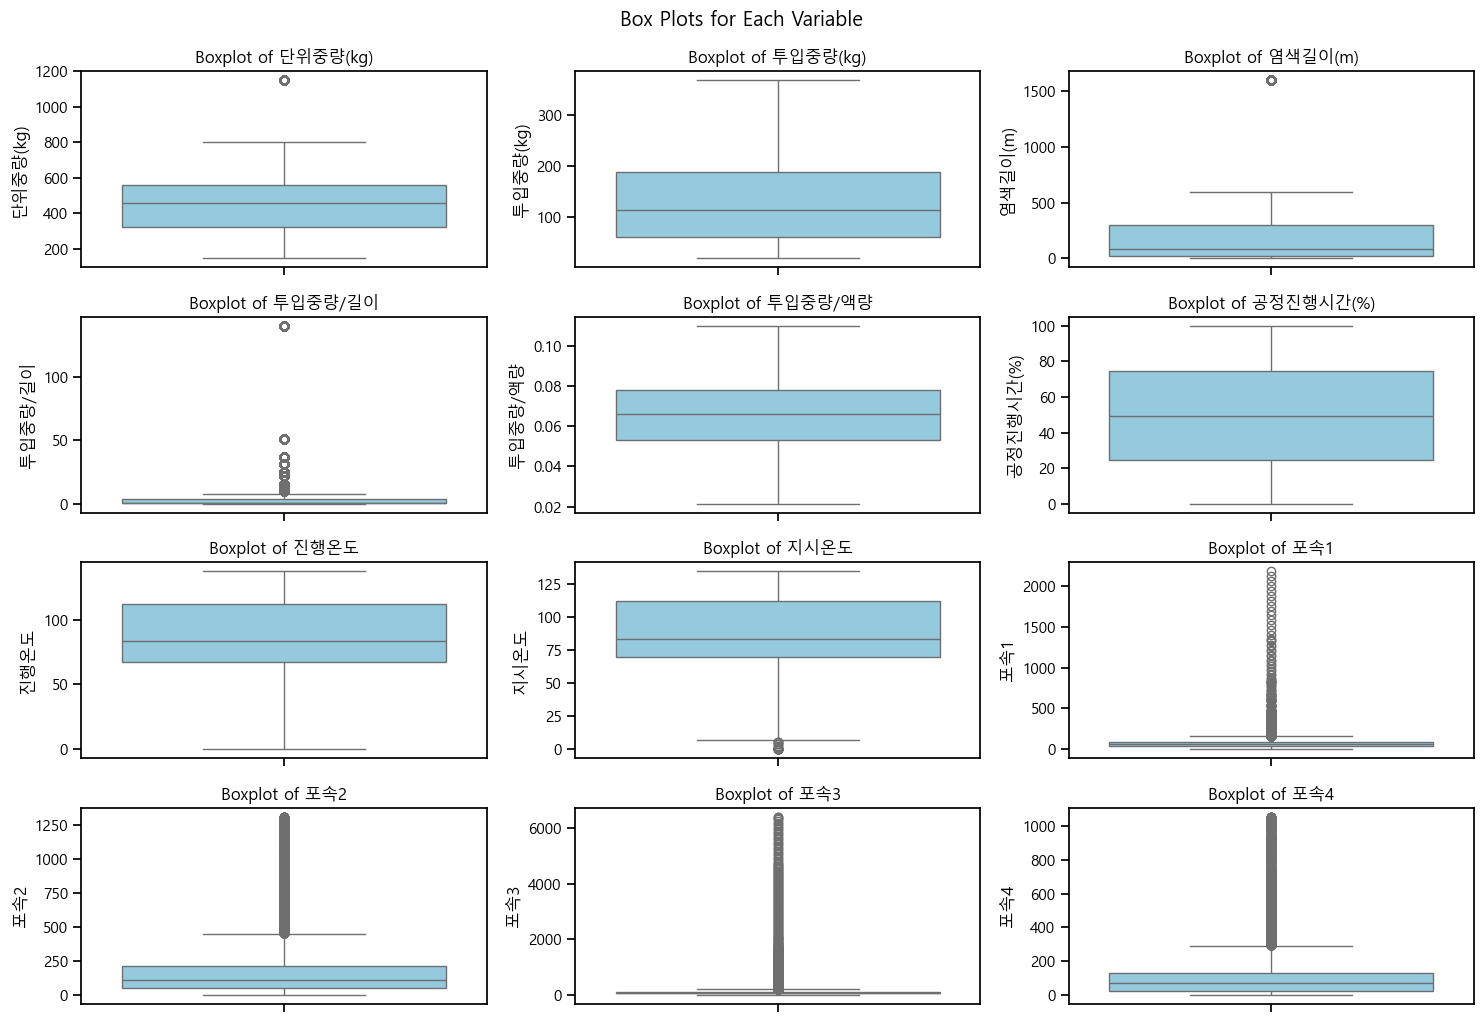

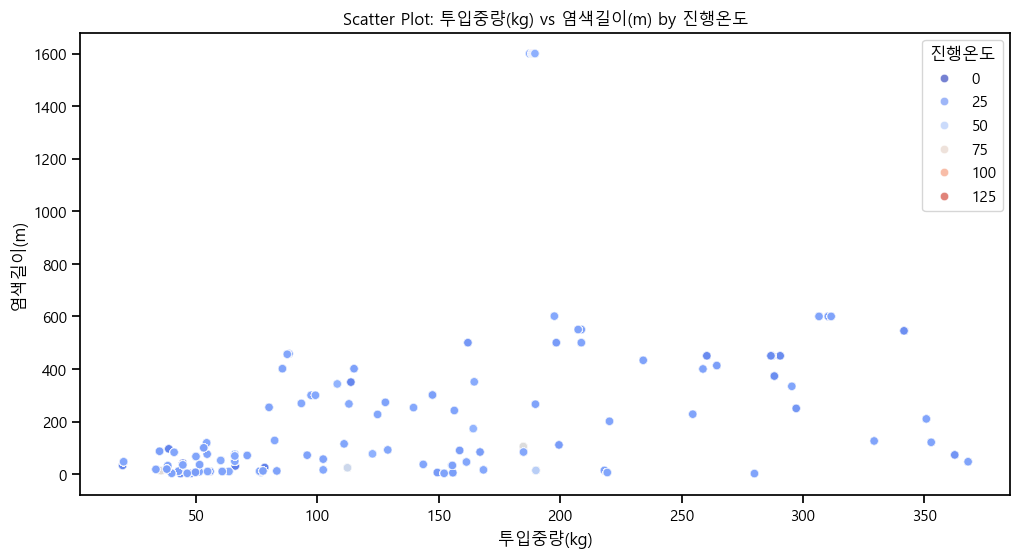

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# 데이터 확인
df5 = df3[['단위중량(kg)', '투입중량(kg)', '염색길이(m)', '투입중량/길이', '투입중량/액량',
           '공정진행시간(%)', '진행온도','지시온도', '포속1', '포속2', '포속3', '포속4']]

# 스타일 설정
sns.set_context("notebook", font_scale=1)
plt.figure(figsize=(15, 12))

# 1. 히스토그램 - 각 변수의 분포 확인
plt.grid(False)
df5.hist(bins=20, figsize=(15, 12), layout=(4, 3), edgecolor='black')
plt.suptitle("Histogram of Each Variable", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()



# 4. 박스플롯 - 각 변수의 이상치 확인
plt.figure(figsize=(15, 10))
for i, col in enumerate(df5.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df5, y=col, color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

plt.suptitle("Box Plots for Each Variable", y=1.02)
plt.show()

# 5. 산점도 (Scatter Plot) - 일부 변수 간 관계 시각화 예시
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df5, x='투입중량(kg)', y='염색길이(m)', hue='진행온도', palette='coolwarm', alpha=0.7)
plt.title("Scatter Plot: 투입중량(kg) vs 염색길이(m) by 진행온도")
plt.xlabel("투입중량(kg)")
plt.ylabel("염색길이(m)")
plt.show()


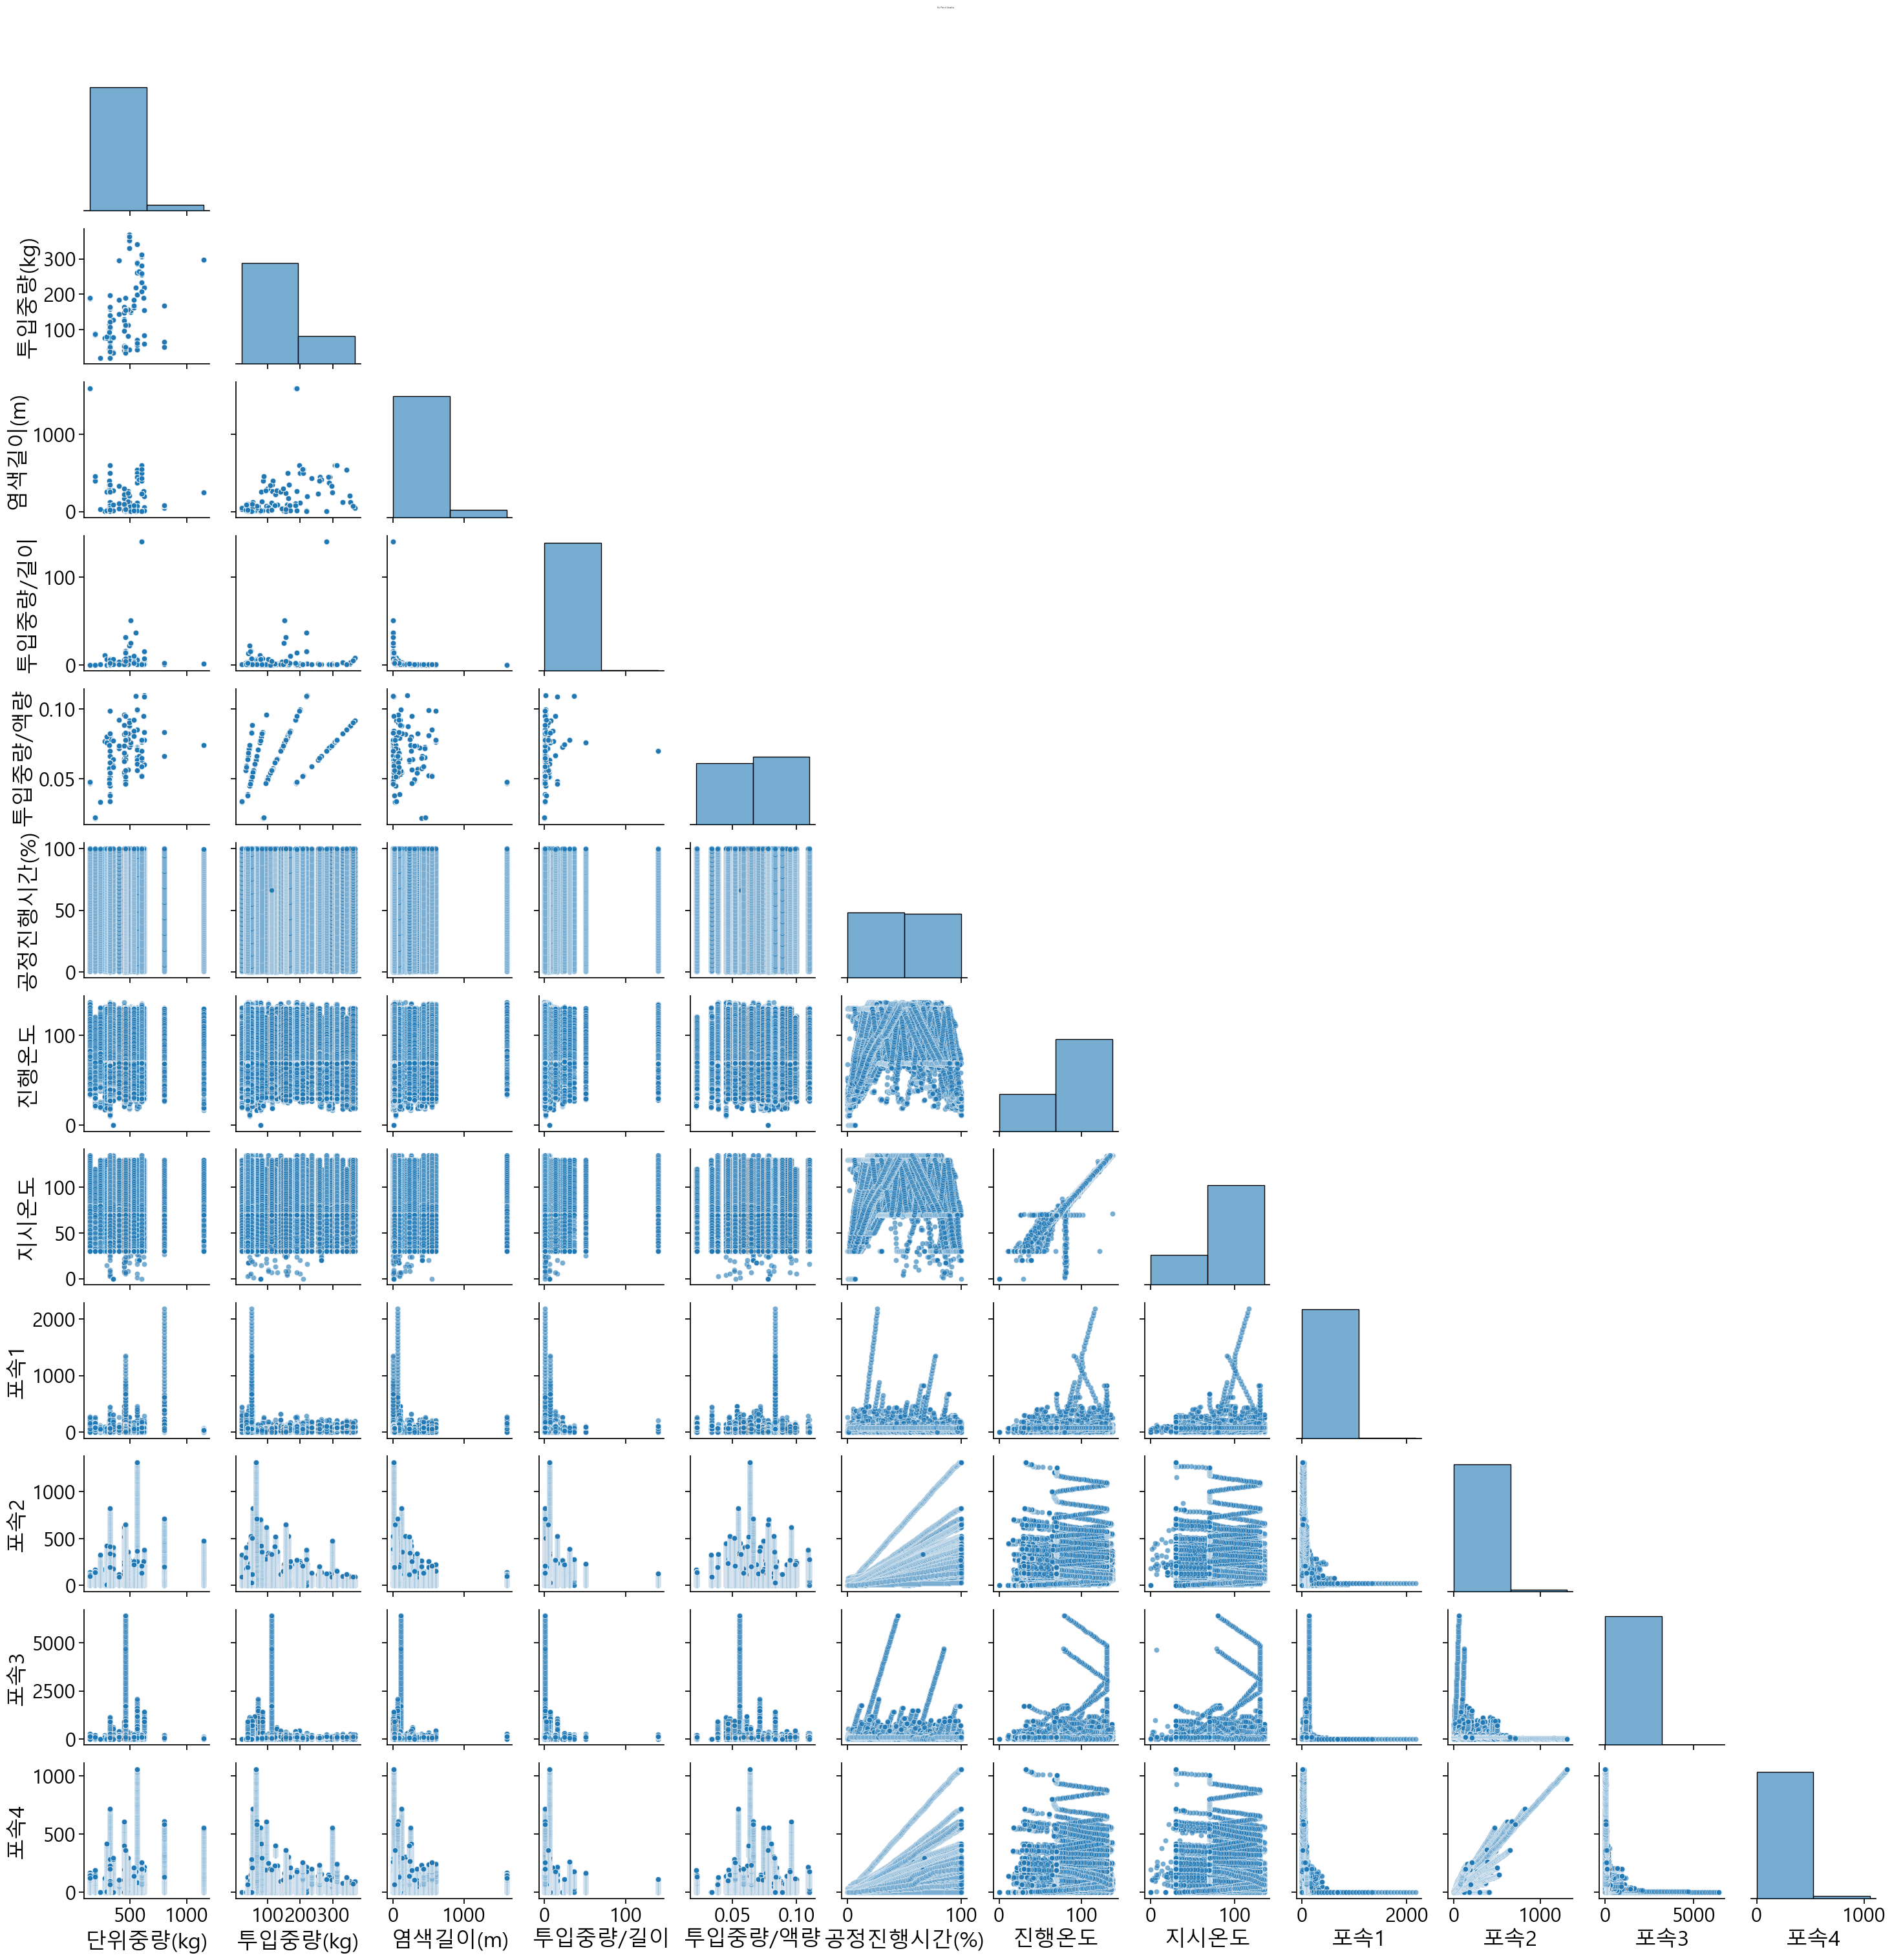

In [28]:
# 3. 쌍플롯 (Pair Plot) - 변수 간 분포와 관계 시각화
sns.set_context("notebook", font_scale=2)
sns.pairplot(df5, corner=True, plot_kws={'alpha': 0.6}, diag_kws={'alpha': 0.6, 'bins': 2})
plt.suptitle("Pair Plot of Variables", y=1.02, fontsize=2)  # fontsize를 지정하여 글자 크기 조정
plt.show()


In [33]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# df3의 모든 독립 변수(VIF 계산 대상)를 변수에 할당합니다.
X = df5.copy()  # df3이 피처들로만 구성된 경우
X = X[['단위중량(kg)', '투입중량(kg)', '염색길이(m)', '투입중량/길이', '투입중량/액량',
           '공정진행시간(%)', '진행온도','포속1', '포속2', '포속3', '포속4']]

# 상수열 추가 (VIF 계산 시 상수가 필요함)
X = add_constant(X)

# VIF 계산 및 출력
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 상수열('const') 제거
vif_data = vif_data[vif_data['Feature'] != 'const']

print(vif_data)


      Feature       VIF
1    단위중량(kg)  1.679272
2    투입중량(kg)  2.530461
3     염색길이(m)  2.240949
4     투입중량/길이  1.092230
5     투입중량/액량  1.720104
6   공정진행시간(%)  1.759076
7        진행온도  1.025177
8         포속1  1.118713
9         포속2  7.821213
10        포속3  1.038600
11        포속4  5.638443


In [25]:
df3['목표온도'].value_counts()

목표온도
0      28775
30      1356
70       711
80       438
50       345
40       326
130      258
100      149
120       94
135       81
60        28
110       17
90        14
20         9
75         7
Name: count, dtype: int64

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [6]:
# 한글폰트 사용을 위한 환경 설정. '맑은 고딕'으로 폰트 설정
path ='C:\\WINDOWS\\Fonts\\malgunbd.ttf'
font_name = fm.FontProperties(fname = path, size =10).get_name()
plt.rc('font', family = font_name)

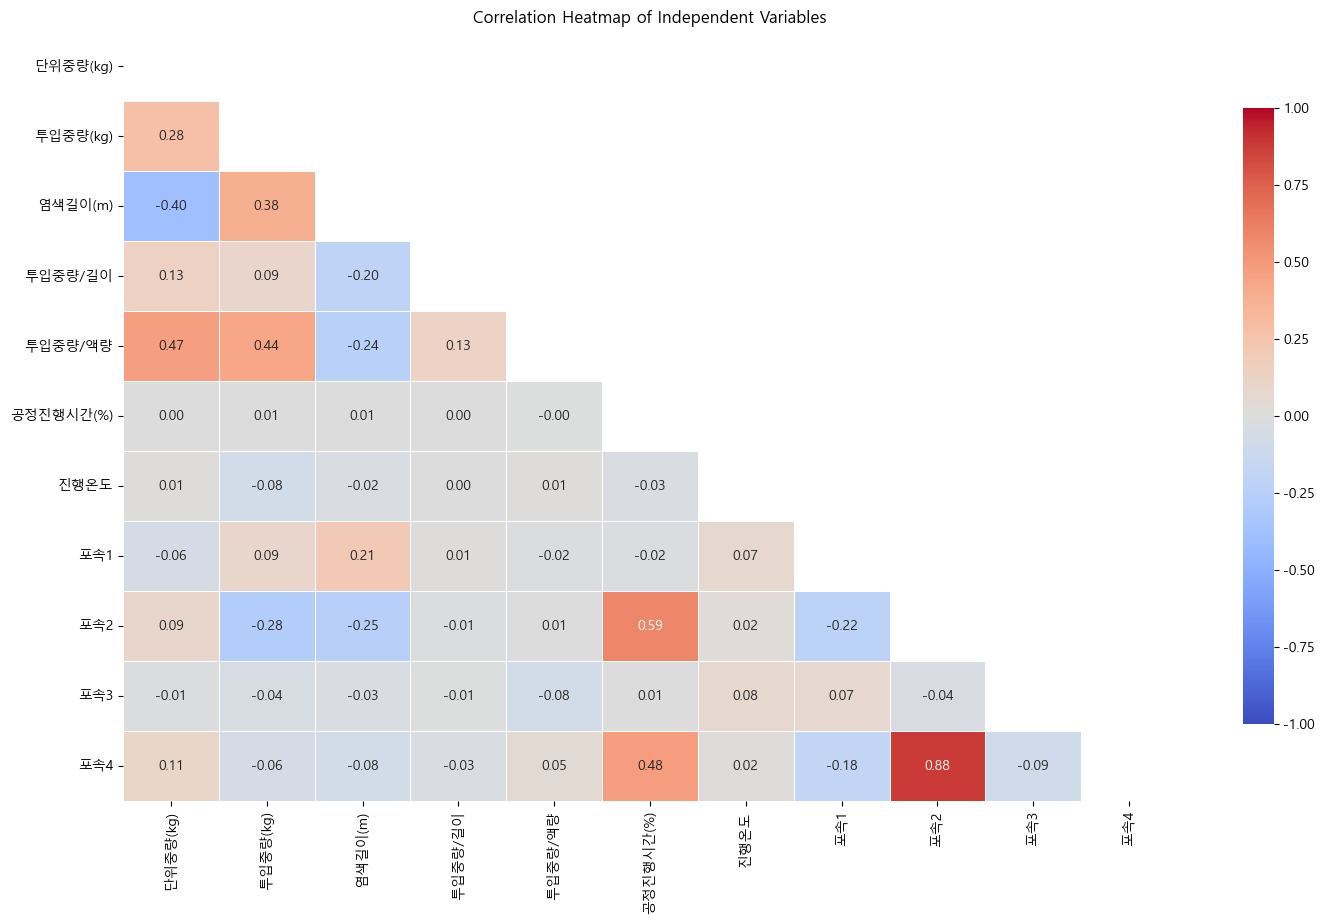

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.unicode_minus'] =False
# 독립 변수 정의
X = df3[['단위중량(kg)', '투입중량(kg)', '염색길이(m)', '투입중량/길이', '투입중량/액량',
         '공정진행시간(%)', '진행온도', '포속1', '포속2', '포속3', '포속4']]

# 피어슨 상관계수 계산
corr = X.corr()

# 상삼각형 형태로 표시하기 위한 mask 정의
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 그리기
fig, ax = plt.subplots(figsize=(17, 10))
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt=".2f", 
            linewidths=0.5, cbar_kws={"shrink": .8}, ax=ax)

# 배경 그리드 제거
ax.grid(False)
plt.title("Correlation Heatmap of Independent Variables")
plt.show()


[LightGBM] [Warning] Unknown parameter: lgbm_num_leaves
[LightGBM] [Warning] Unknown parameter: lgbm_n_estimators
[LightGBM] [Warning] Unknown parameter: lgbm_learning_rate
[LightGBM] [Warning] Unknown parameter: lgbm_max_depth
[LightGBM] [Warning] Unknown parameter: lgbm_min_gain_to_split
[LightGBM] [Warning] Unknown parameter: lgbm_num_leaves
[LightGBM] [Warning] Unknown parameter: lgbm_n_estimators
[LightGBM] [Warning] Unknown parameter: lgbm_learning_rate
[LightGBM] [Warning] Unknown parameter: lgbm_max_depth
[LightGBM] [Warning] Unknown parameter: lgbm_min_gain_to_split
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1990
[LightGBM] [Info] Number of data points in the train set: 26086, number of used features: 11
[LightGBM] [Info] Start training from score 2.063524


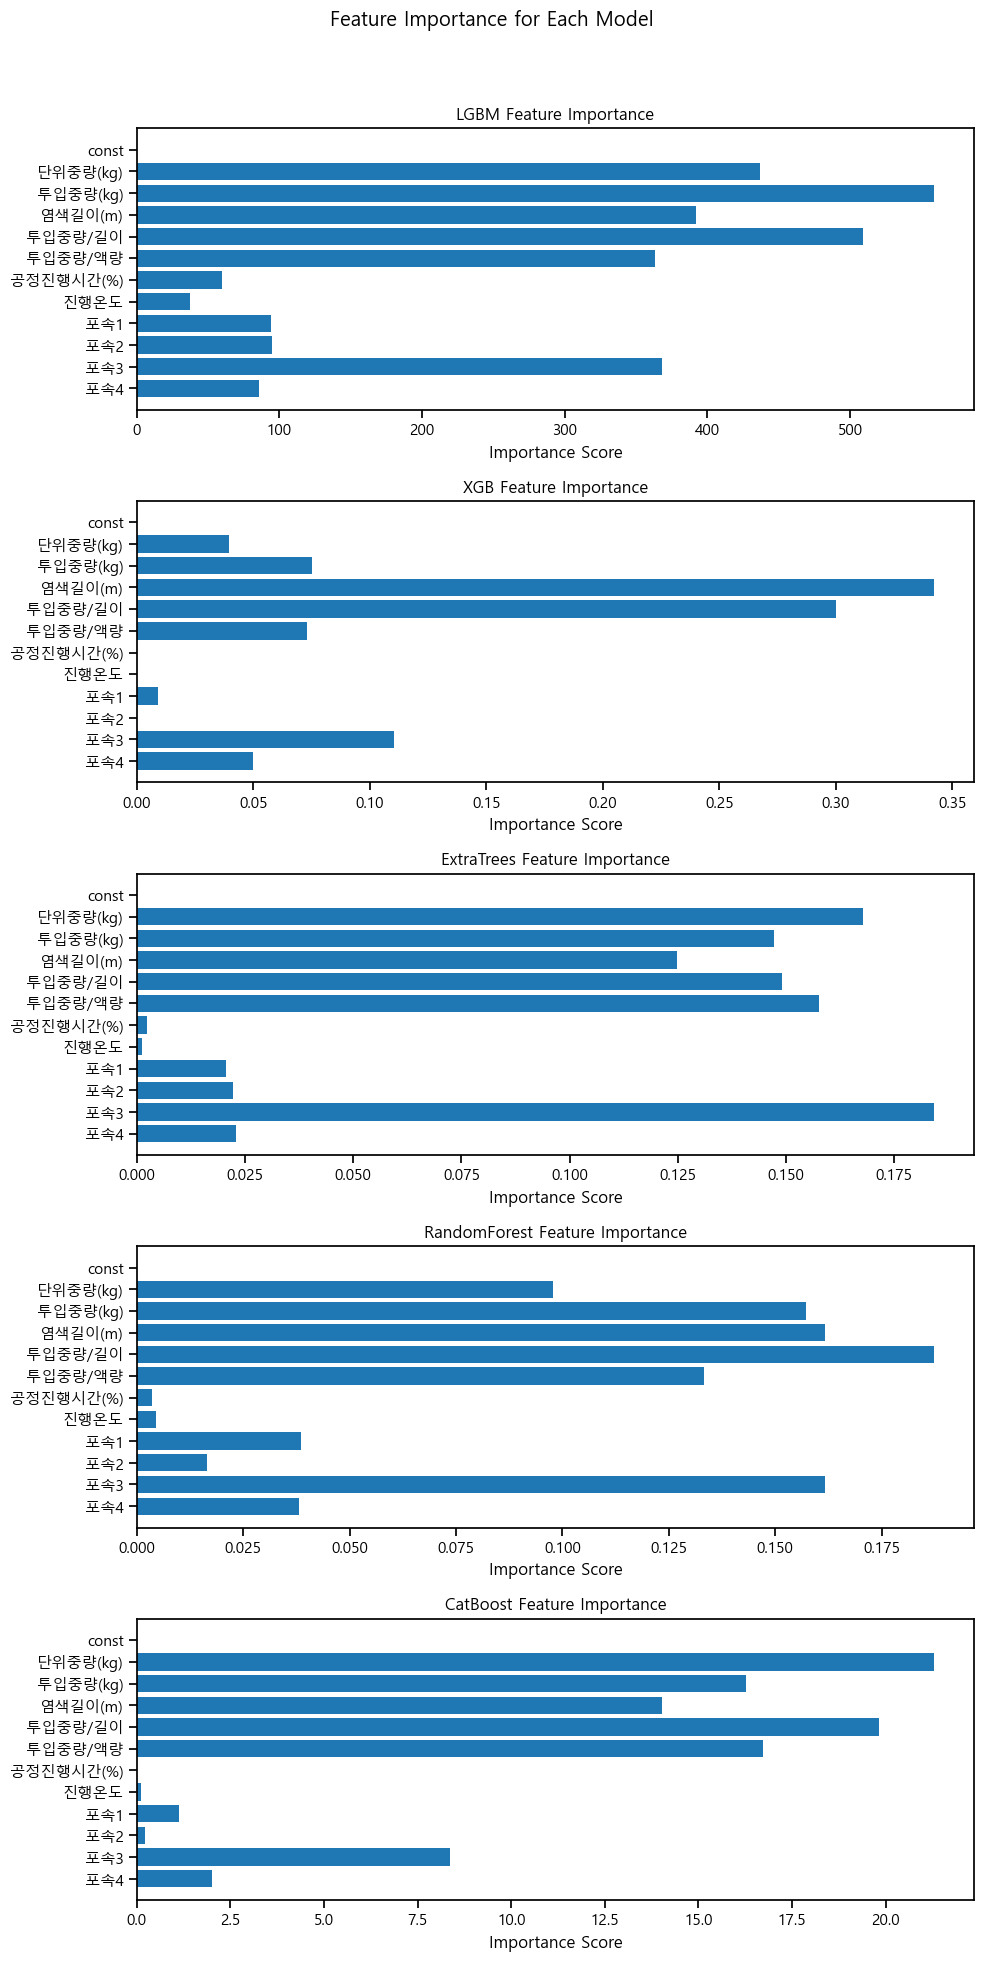

In [43]:
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    from xgboost import XGBRegressor
    from lightgbm import LGBMRegressor
    from catboost import CatBoostRegressor
    from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor

    # 변수 세팅
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    feature_names = X_train.columns  # 특성 이름

    # 각 모델 인스턴스 생성
    models = {
        'LGBM': LGBMRegressor(
            lgbm_n_estimators = 389, lgbm_learning_rate=0.04244362441199455, lgbm_max_depth = 8, lgbm_num_leaves = 46, lgbm_min_gain_to_split = 0.0051584098046367766
        ),
        'XGB': XGBRegressor(
            n_estimators=474, learning_rate=0.014992610769103841, max_depth=17, 
            subsample=0.8547774783780632, colsample_bytree=0.9263031709964487
        ),
        'ExtraTrees': ExtraTreesRegressor(
            n_estimators=393, max_depth=20, min_samples_split=3, min_samples_leaf=1
        ),
        'RandomForest': RandomForestRegressor(
            n_estimators=342, max_depth=20, min_samples_split=6, min_samples_leaf=1, max_features='sqrt'
        ),
        'CatBoost': CatBoostRegressor(
            n_estimators=472, learning_rate=0.06481236354172037, depth=7, l2_leaf_reg=1.113786466827839, verbose=0
        )
    }

    # 각 모델 학습 후 feature importance 저장
    feature_importances = {}
    for name, model in models.items():
        model.fit(X_train, y_train.values.ravel())
        feature_importances[name] = model.feature_importances_

    # 특성 중요도 시각화
    fig, axes = plt.subplots(len(models), 1, figsize=(10, len(models) * 4))
    fig.suptitle("Feature Importance for Each Model")

    for i, (name, importance) in enumerate(feature_importances.items()):
        axes[i].barh(feature_names, importance, align="center")
        axes[i].set_title(f"{name} Feature Importance")
        axes[i].set_xlabel("Importance Score")
        axes[i].invert_yaxis()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


In [45]:
from sklearn.metrics import r2_score, mean_squared_error


for name, model in models.items():
    # 모델 학습
    model.fit(X_train, y_train.values.ravel())
    
    # 테스트 데이터 예측
    y_pred = model.predict(X_test)
    
    # 성능 평가
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    model_performance[name] = {'R² Score': r2, 'RMSE': rmse}
    
    # 특성 중요도 저장
    feature_importances[name] = model.feature_importances_

# 성능 출력
for name, metrics in model_performance.items():
    print(f"Model: {name}")
    print(f"R² Score: {metrics['R² Score']}")
    print(f"RMSE: {metrics['RMSE']}")
    print("------------")



[LightGBM] [Warning] Unknown parameter: lgbm_num_leaves
[LightGBM] [Warning] Unknown parameter: lgbm_n_estimators
[LightGBM] [Warning] Unknown parameter: lgbm_learning_rate
[LightGBM] [Warning] Unknown parameter: lgbm_max_depth
[LightGBM] [Warning] Unknown parameter: lgbm_min_gain_to_split
[LightGBM] [Warning] Unknown parameter: lgbm_num_leaves
[LightGBM] [Warning] Unknown parameter: lgbm_n_estimators
[LightGBM] [Warning] Unknown parameter: lgbm_learning_rate
[LightGBM] [Warning] Unknown parameter: lgbm_max_depth
[LightGBM] [Warning] Unknown parameter: lgbm_min_gain_to_split
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1990
[LightGBM] [Info] Number of data points in the train set: 26086, number of used features: 11
[LightGBM] [Info] Start training from score 2.063524
[LightGBM] [

C:\Users\USER\anaconda3\envs\3.9.18\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\anaconda3\envs\3.9.18\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\anaconda3\envs\3.9.18\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\anaconda3\envs\3.9.18\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To cal

Model: LGBM
R² Score: 0.9982863893062596
RMSE: 0.12937006461280104
------------
Model: XGB
R² Score: 0.9999077755967238
RMSE: 0.03001239406536221
------------
Model: ExtraTrees
R² Score: 0.9998043668661096
RMSE: 0.043711823012297917
------------
Model: RandomForest
R² Score: 0.9995410156648125
RMSE: 0.06695401804547715
------------
Model: CatBoost
R² Score: 0.999585426854366
RMSE: 0.0636323989670368
------------


C:\Users\USER\anaconda3\envs\3.9.18\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [46]:
# 테스트 데이터의 첫 번째 샘플에 대해 각 모델의 예측값을 출력
sample_index = 1  # 첫 번째 샘플

# 결과 저장을 위한 딕셔너리 생성
predictions = {}

# 각 모델로 예측 수행
for name, model in models.items():
    y_pred_sample = model.predict(X_test.iloc[[sample_index]])[0]  # 첫 번째 샘플에 대한 예측
    predictions[name] = y_pred_sample
    print(f"{name} 모델 예측값:", y_pred_sample)

# 예시로 각 모델의 예측값을 출력합니다.
print("\n모델별 첫 번째 샘플 예측값:")
for model_name, prediction in predictions.items():
    print(f"{model_name}: {prediction}")


[LightGBM] [Warning] Unknown parameter: lgbm_num_leaves
[LightGBM] [Warning] Unknown parameter: lgbm_n_estimators
[LightGBM] [Warning] Unknown parameter: lgbm_learning_rate
[LightGBM] [Warning] Unknown parameter: lgbm_max_depth
[LightGBM] [Warning] Unknown parameter: lgbm_min_gain_to_split
LGBM 모델 예측값: 0.47158075061497
XGB 모델 예측값: 0.4372646
ExtraTrees 모델 예측값: 0.435730148237588
RandomForest 모델 예측값: 0.43616040491192776
CatBoost 모델 예측값: 0.4399206009456127

모델별 첫 번째 샘플 예측값:
LGBM: 0.47158075061497
XGB: 0.4372645914554596
ExtraTrees: 0.435730148237588
RandomForest: 0.43616040491192776
CatBoost: 0.4399206009456127


[LightGBM] [Warning] Unknown parameter: lgbm_num_leaves
[LightGBM] [Warning] Unknown parameter: lgbm_n_estimators
[LightGBM] [Warning] Unknown parameter: lgbm_learning_rate
[LightGBM] [Warning] Unknown parameter: lgbm_max_depth
[LightGBM] [Warning] Unknown parameter: lgbm_min_gain_to_split
[LightGBM] [Warning] Unknown parameter: lgbm_num_leaves
[LightGBM] [Warning] Unknown parameter: lgbm_n_estimators
[LightGBM] [Warning] Unknown parameter: lgbm_learning_rate
[LightGBM] [Warning] Unknown parameter: lgbm_max_depth
[LightGBM] [Warning] Unknown parameter: lgbm_min_gain_to_split
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1990
[LightGBM] [Info] Number of data points in the train set: 26086, number of used features: 11
[LightGBM] [Info] Start training from score 2.063524


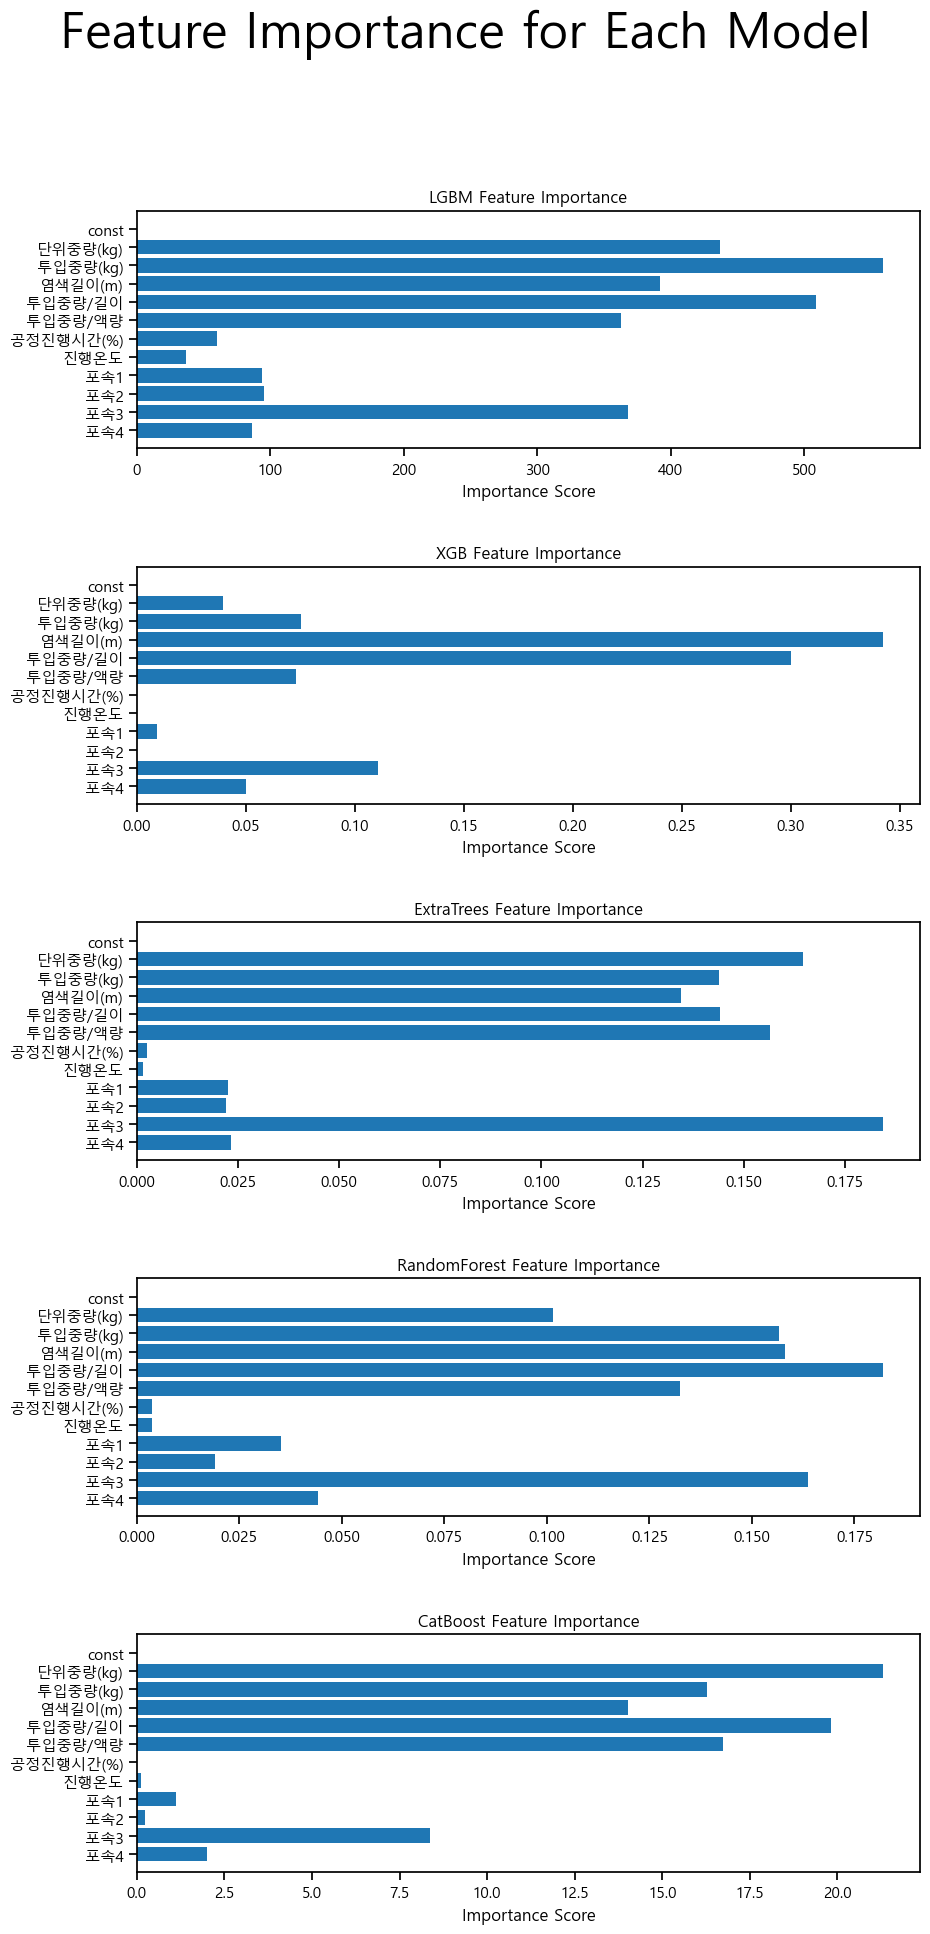

[LightGBM] [Warning] Unknown parameter: lgbm_num_leaves
[LightGBM] [Warning] Unknown parameter: lgbm_n_estimators
[LightGBM] [Warning] Unknown parameter: lgbm_learning_rate
[LightGBM] [Warning] Unknown parameter: lgbm_max_depth
[LightGBM] [Warning] Unknown parameter: lgbm_min_gain_to_split


C:\Users\USER\anaconda3\envs\3.9.18\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\anaconda3\envs\3.9.18\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\anaconda3\envs\3.9.18\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: LGBM
R² Score: 0.9982863893062596
RMSE: 0.12937006461280104
------------
Model: XGB
R² Score: 0.9999077755967238
RMSE: 0.03001239406536221
------------
Model: ExtraTrees
R² Score: 0.9997742328929098
RMSE: 0.04695783303055087
------------
Model: RandomForest
R² Score: 0.9995146719015702
RMSE: 0.06884865034793389
------------
Model: CatBoost
R² Score: 0.999585426854366
RMSE: 0.0636323989670368
------------


C:\Users\USER\anaconda3\envs\3.9.18\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\anaconda3\envs\3.9.18\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [49]:
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
plt.rcParams.update({'font.size': 30})
# 변수 세팅
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature_names = X_train.columns  # 특성 이름

# 각 모델 인스턴스 생성
models = {
    'LGBM': LGBMRegressor(
        lgbm_n_estimators = 389, lgbm_learning_rate=0.04244362441199455, lgbm_max_depth = 8, lgbm_num_leaves = 46, lgbm_min_gain_to_split = 0.0051584098046367766
    ),
    'XGB': XGBRegressor(
        n_estimators=474, learning_rate=0.014992610769103841, max_depth=17, 
        subsample=0.8547774783780632, colsample_bytree=0.9263031709964487
    ),
    'ExtraTrees': ExtraTreesRegressor(
        n_estimators=393, max_depth=20, min_samples_split=3, min_samples_leaf=1
    ),
    'RandomForest': RandomForestRegressor(
        n_estimators=342, max_depth=20, min_samples_split=6, min_samples_leaf=1, max_features='sqrt'
    ),
    'CatBoost': CatBoostRegressor(
        n_estimators=472, learning_rate=0.06481236354172037, depth=7, l2_leaf_reg=1.113786466827839, verbose=0
    )
}

# 각 모델 학습 후 feature importance 저장
feature_importances = {}
for name, model in models.items():
    model.fit(X_train, y_train.values.ravel())
    feature_importances[name] = model.feature_importances_

# 특성 중요도 시각화
fig, axes = plt.subplots(len(models), 1, figsize=(10, len(models) * 4))
fig.suptitle("Feature Importance for Each Model")

for i, (name, importance) in enumerate(feature_importances.items()):
    axes[i].barh(feature_names, importance, align="center")
    axes[i].set_title(f"{name} Feature Importance")
    axes[i].set_xlabel("Importance Score")
    axes[i].invert_yaxis()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# 결과 저장을 위한 딕셔너리 생성
model_performance = {}

# 각 모델에 대해 R² 및 RMSE 계산
for name, model in models.items():
    # 테스트 데이터에 대한 예측
    y_pred = model.predict(X_test)
    
    # R² 스코어와 RMSE 계산
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # 성능 저장
    model_performance[name] = {'R² Score': r2, 'RMSE': rmse}

# 결과 출력
for name, metrics in model_performance.items():
    print(f"Model: {name}")
    print(f"R² Score: {metrics['R² Score']}")
    print(f"RMSE: {metrics['RMSE']}")
    print("------------")


C:\Users\USER\anaconda3\envs\3.9.18\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\USER\anaconda3\envs\3.9.18\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\USER\anaconda3\envs\3.9.18\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\USER\anaconda3\envs\3.9.18\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\USER\anaconda3\envs\3.9.18\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


[LightGBM] [Warning] min_gain_to_split is set=0.0052, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0052
[LightGBM] [Warning] min_gain_to_split is set=0.0052, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1990
[LightGBM] [Info] Number of data points in the train set: 26086, number of used features: 11
[LightGBM] [Info] Start training from score 2.063524
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits wit

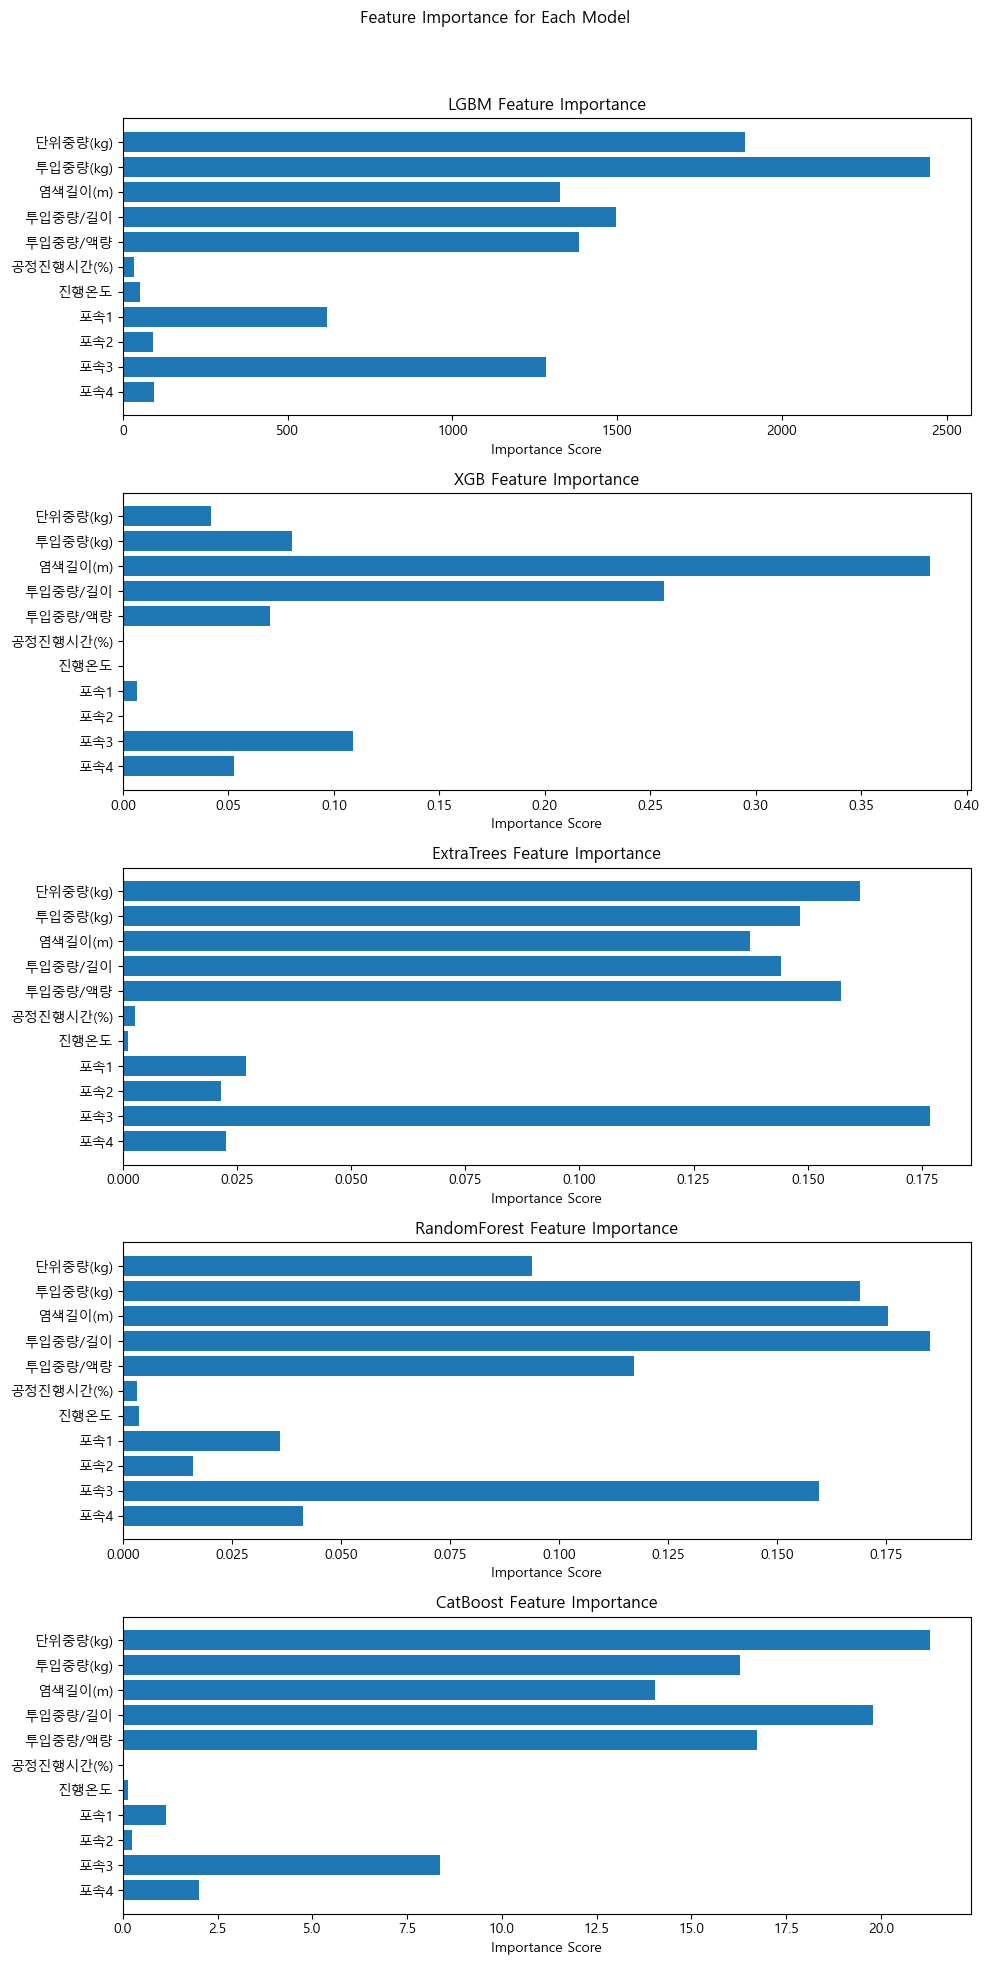

[LightGBM] [Warning] min_gain_to_split is set=0.0052, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0052


C:\Users\USER\anaconda3\envs\3.9.18\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\anaconda3\envs\3.9.18\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\anaconda3\envs\3.9.18\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model: LGBM
R² Score: 0.9999596175485895
RMSE: 0.019859762603879814
------------
Model: XGB
R² Score: 0.9999228308589034
RMSE: 0.027453615472209925
------------
Model: ExtraTrees
R² Score: 0.9997893802721317
RMSE: 0.045355215716256524
------------
Model: RandomForest
R² Score: 0.9995744907957875
RMSE: 0.06446621801751004
------------
Model: CatBoost
R² Score: 0.9995585997702298
RMSE: 0.06565895866633266
------------


C:\Users\USER\anaconda3\envs\3.9.18\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\anaconda3\envs\3.9.18\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [12]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
feature_names = X_train.columns  # 특성 이름

# 각 모델 인스턴스 생성
models = {
    'LGBM': LGBMRegressor(
        n_estimators=389, learning_rate=0.0424, max_depth=8, num_leaves=46, min_gain_to_split=0.0052
    ),
    'XGB': XGBRegressor(
        n_estimators=474, learning_rate=0.015, max_depth=17, subsample=0.8548, colsample_bytree=0.9263
    ),
    'ExtraTrees': ExtraTreesRegressor(
        n_estimators=393, max_depth=20, min_samples_split=3, min_samples_leaf=1
    ),
    'RandomForest': RandomForestRegressor(
        n_estimators=342, max_depth=20, min_samples_split=6, min_samples_leaf=1, max_features='sqrt'
    ),
    'CatBoost': CatBoostRegressor(
        n_estimators=472, learning_rate=0.0648, depth=7, l2_leaf_reg=1.1138, verbose=0
    )
}

# Pipeline을 사용하여 각 모델에 스케일링 추가
model_pipelines = {
    name: Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ]) for name, model in models.items()
}

# 모델 학습 및 특성 중요도 저장
feature_importances = {}
for name, pipeline in model_pipelines.items():
    pipeline.fit(X_train, y_train.values.ravel())
    model = pipeline.named_steps['model']
    feature_importances[name] = model.feature_importances_

# 특성 중요도 시각화
fig, axes = plt.subplots(len(models), 1, figsize=(10, len(models) * 4))
fig.suptitle("Feature Importance for Each Model")

for i, (name, importance) in enumerate(feature_importances.items()):
    axes[i].barh(feature_names, importance, align="center")
    axes[i].set_title(f"{name} Feature Importance")
    axes[i].set_xlabel("Importance Score")
    axes[i].invert_yaxis()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 결과 저장을 위한 딕셔너리 생성
model_performance = {}

# 각 모델에 대해 R² 및 RMSE 계산
for name, pipeline in model_pipelines.items():
    # 테스트 데이터에 대한 예측
    y_pred = pipeline.predict(X_test)
    
    # R² 스코어와 RMSE 계산
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # 성능 저장
    model_performance[name] = {'R² Score': r2, 'RMSE': rmse}

# 결과 출력
for name, metrics in model_performance.items():
    print(f"Model: {name}")
    print(f"R² Score: {metrics['R² Score']}")
    print(f"RMSE: {metrics['RMSE']}")
    print("------------")


[LightGBM] [Warning] Unknown parameter: lgbm_num_leaves
[LightGBM] [Warning] Unknown parameter: lgbm_n_estimators
[LightGBM] [Warning] Unknown parameter: lgbm_learning_rate
[LightGBM] [Warning] Unknown parameter: lgbm_max_depth
[LightGBM] [Warning] Unknown parameter: lgbm_min_gain_to_split
[LightGBM] [Warning] Unknown parameter: lgbm_num_leaves
[LightGBM] [Warning] Unknown parameter: lgbm_n_estimators
[LightGBM] [Warning] Unknown parameter: lgbm_learning_rate
[LightGBM] [Warning] Unknown parameter: lgbm_max_depth
[LightGBM] [Warning] Unknown parameter: lgbm_min_gain_to_split
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1990
[LightGBM] [Info] Number of data points in the train set: 26086, number of used features: 11
[LightGBM] [Info] Start training from score 2.063524


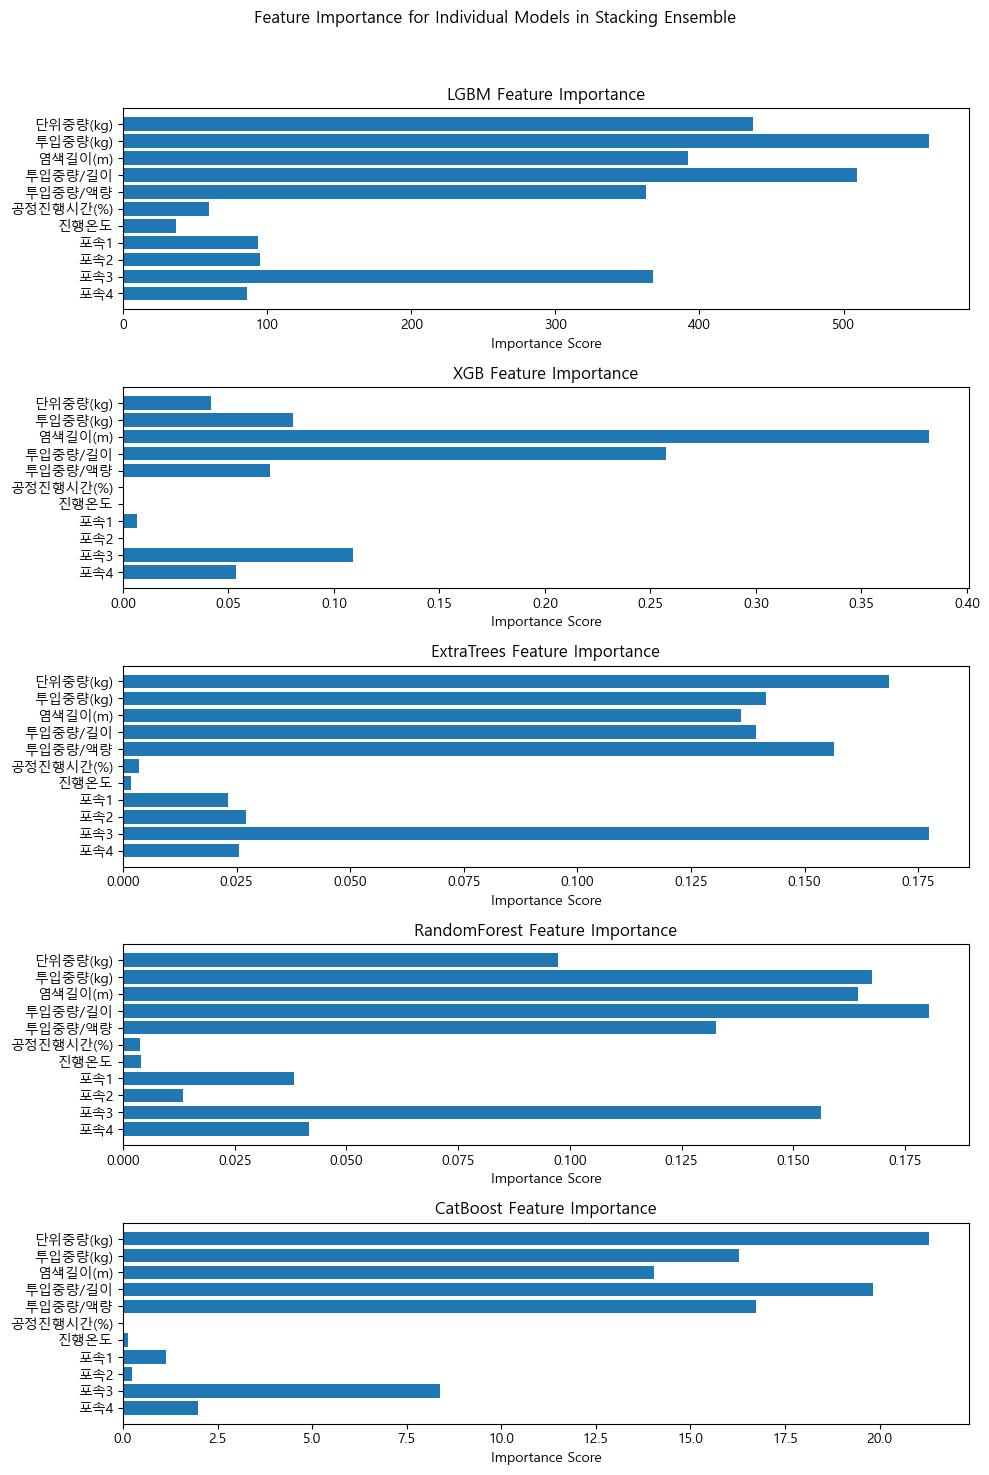

In [153]:
import matplotlib.pyplot as plt

# 각 개별 모델의 feature importance 추출
feature_importances = {}
for name, model in models.items():
    # XGBoost, LightGBM, ExtraTrees, RandomForest, CatBoost에서 feature_importances_ 속성을 지원
    if hasattr(model, 'feature_importances_'):
        model.fit(X_train, y_train.values.ravel())
        feature_importances[name] = model.feature_importances_

# 피처 중요도 시각화
feature_names = X_train.columns
fig, axes = plt.subplots(len(feature_importances), 1, figsize=(10, len(feature_importances) * 3))
fig.suptitle("Feature Importance for Individual Models in Stacking Ensemble")

for i, (name, importance) in enumerate(feature_importances.items()):
    axes[i].barh(feature_names, importance, align="center")
    axes[i].set_title(f"{name} Feature Importance")
    axes[i].set_xlabel("Importance Score")
    axes[i].invert_yaxis()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [116]:
feature_importances

{'LGBM': array([437, 559, 392, 509, 363,  60,  37,  94,  95, 368,  86]),
 'XGB': array([4.1889027e-02, 8.0358528e-02, 3.8186249e-01, 2.5721470e-01,
        6.9622174e-02, 1.0885608e-05, 1.6640424e-05, 6.5169851e-03,
        6.0335751e-06, 1.0914200e-01, 5.3360578e-02], dtype=float32),
 'ExtraTrees': array([0.1745841 , 0.13740174, 0.13471183, 0.13896162, 0.15920193,
        0.00271972, 0.00200391, 0.02366418, 0.02496311, 0.17857515,
        0.0232127 ]),
 'RandomForest': array([0.08759344, 0.17286754, 0.15341637, 0.18579246, 0.13580085,
        0.00229133, 0.00378553, 0.03405987, 0.0141247 , 0.16821138,
        0.04205652]),
 'CatBoost': array([2.12957578e+01, 1.62741333e+01, 1.40246831e+01, 1.98245806e+01,
        1.67249044e+01, 1.07640287e-02, 1.22883702e-01, 1.12613992e+00,
        2.31096510e-01, 8.37010352e+00, 1.99495318e+00])}

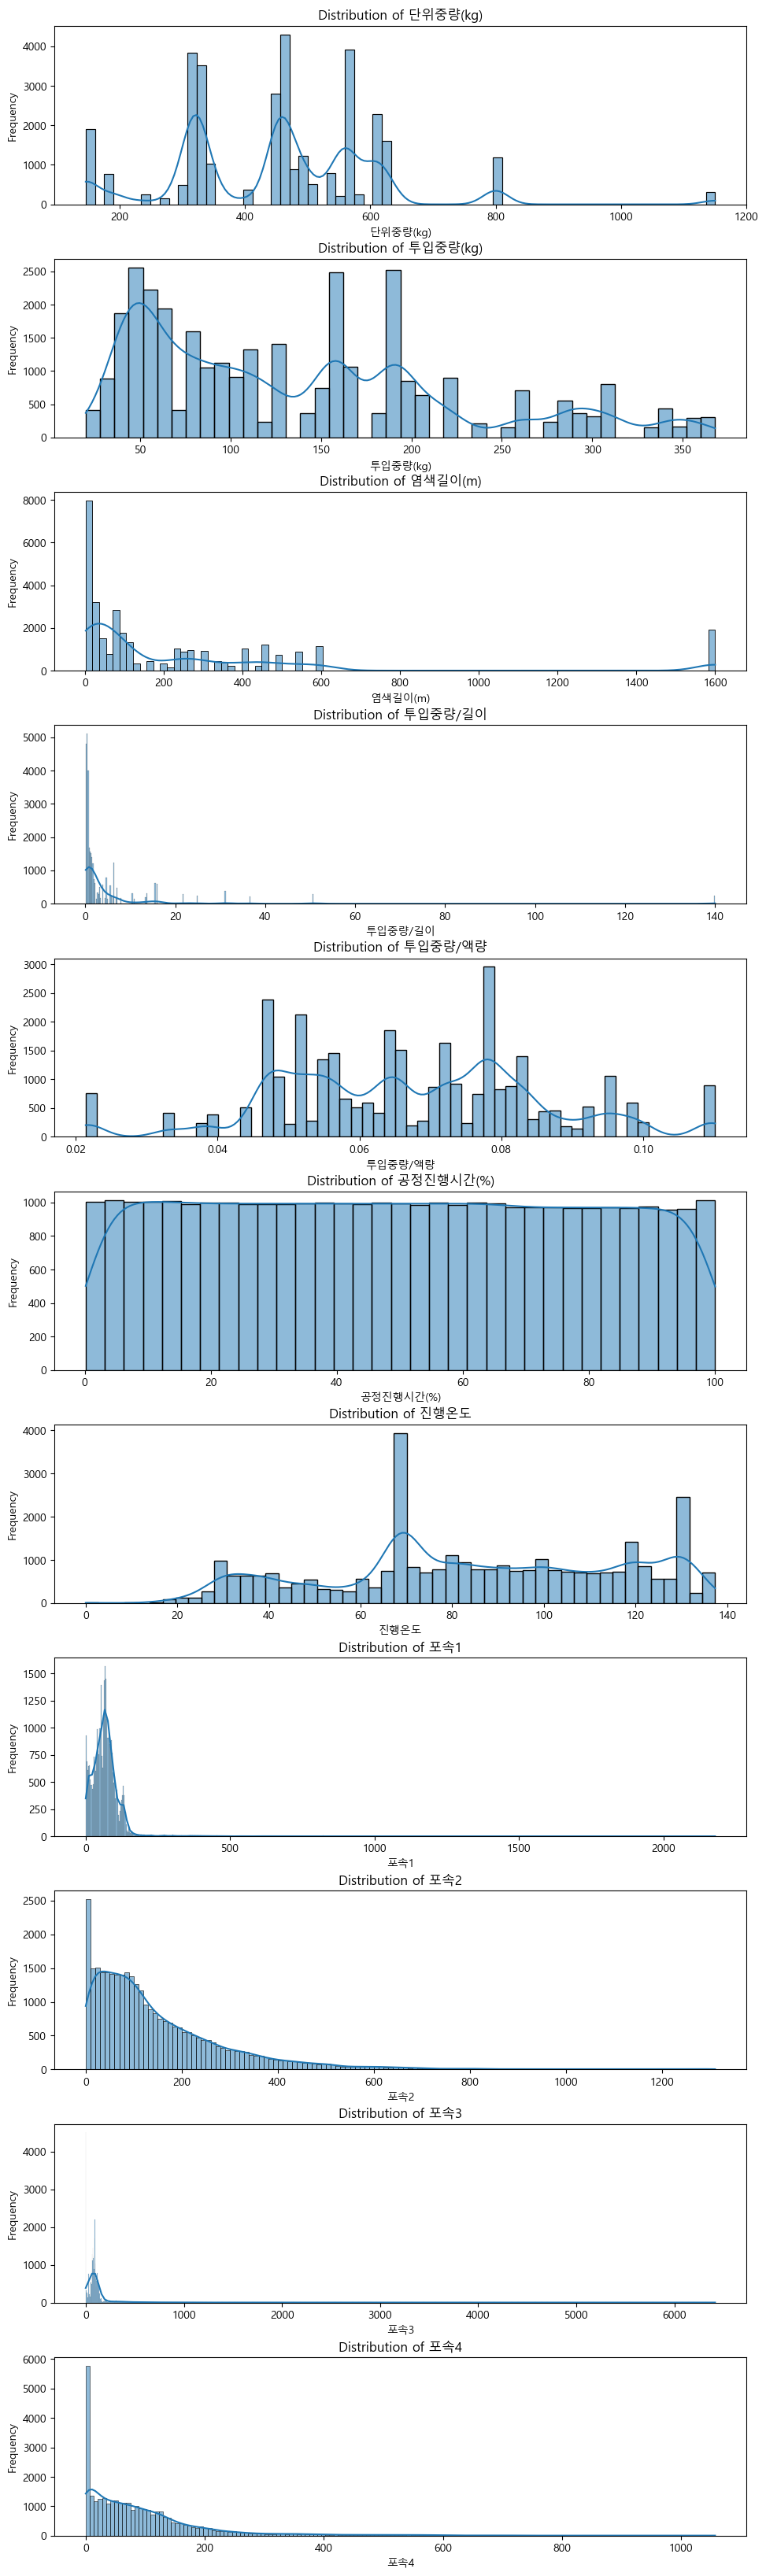

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# 독립변수 목록
Xcols = ['단위중량(kg)', '투입중량(kg)', '염색길이(m)', '투입중량/길이', '투입중량/액량',
         '공정진행시간(%)', '진행온도', '포속1', '포속2', '포속3', '포속4']

# 전체 변수들 시각화 (히스토그램과 커널 밀도 추정)
fig, axes = plt.subplots(nrows=len(Xcols), ncols=1, figsize=(10, 3 * len(Xcols)))
fig.tight_layout(pad=3.0)

# 각 변수에 대한 분포 그래프 그리기
for i, col in enumerate(Xcols):
    sns.histplot(df4[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.show()


In [142]:
df5['포속3'].max()

6415

In [11]:
# 독립변수 정의
Xcols = ['단위중량(kg)', '투입중량(kg)', '염색길이(m)', '투입중량/길이', '투입중량/액량', '공정진행시간(%)',
'진행온도', '포속1','포속2','포속3', '포속4']
# 종속변수 정의
ycol = ['염색색차 DE']
# 독립변수 데이터셋 추출
X = df3[Xcols]
# 종속변수 데이터셋 추출
y = df3[ycol]

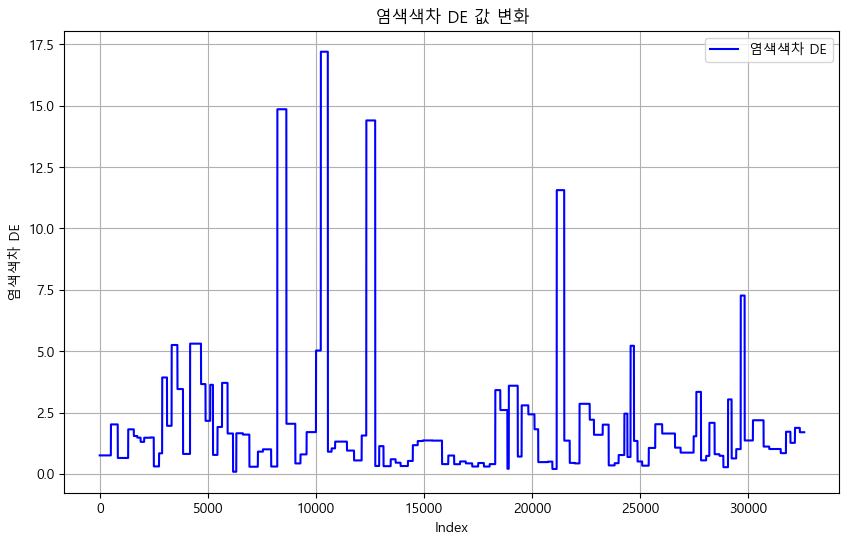

In [101]:
import matplotlib.pyplot as plt

# y 데이터 확인 및 시각화
y_values = y # y 데이터의 '염색색차 DE' 열

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(y_values, label='염색색차 DE', color='b')
plt.xlabel('Index')
plt.ylabel('염색색차 DE')
plt.title('염색색차 DE 값 변화')
plt.legend()
plt.grid(True)
plt.show()

구간별 빈도수:
 염색색차 DE
0    6679
1    6370
2    6592
3    6479
4    6488
Name: count, dtype: int64


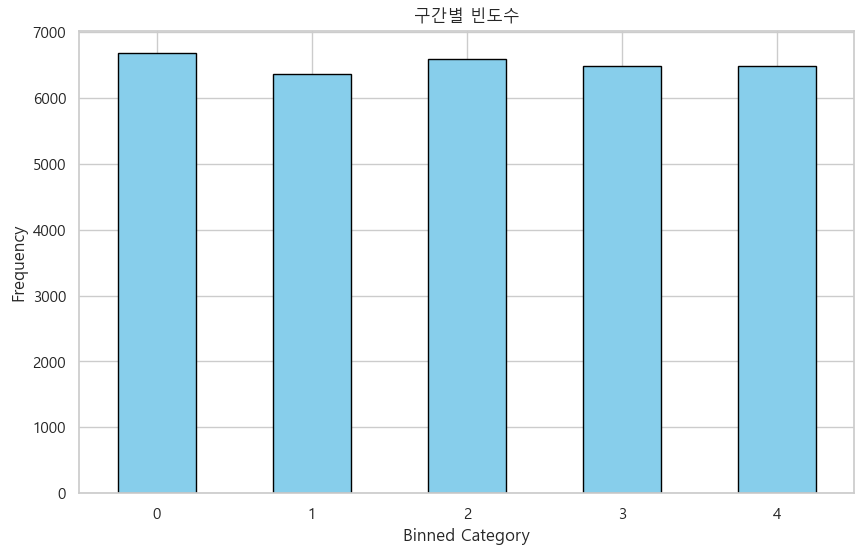

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# y 데이터 예시
# y = pd.DataFrame({'염색색차 DE': ... })  # 실제 데이터가 있을 경우 사용하세요.

# 동일한 빈도로 구간 나누기 (예: 5개 구간)
num_bins = 5
y_binned = pd.qcut(y, q=num_bins, labels = False)  # 동일 빈도의 구간 생성

# 구간 정보 및 빈도수 확인
print("구간별 빈도수:\n", y_binned.value_counts().sort_index())

# 시각화
plt.figure(figsize=(10, 6))
y_binned.value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("구간별 빈도수")
plt.xlabel("Binned Category")
plt.ylabel("Frequency")
plt.xticks(rotation=0, ha='center')
plt.show()


In [94]:
from scipy.stats import boxcox

# Box-Cox 변환
y_boxcox, fitted_lambda = boxcox(y + 1)  # 0일 수 있는 값에 +1을 더해 변환
print("Optimal lambda for Box-Cox:", fitted_lambda)

Optimal lambda for Box-Cox: -0.9218523614228976


In [99]:
from scipy.stats import shapiro

# Shapiro-Wilk 정규성 검정
stat, p_value = shapiro(y_boxcox)
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p_value)

# p-value가 0.05보다 작으면 정규성을 따르지 않는다고 판단
if p_value < 0.05:
    print("데이터가 정규성을 따르지 않습니다.")
else:
    print("데이터가 정규성을 따릅니다.")


Shapiro-Wilk Test Statistic: 0.9772303342443647
p-value: 5.868848623804446e-56
데이터가 정규성을 따르지 않습니다.


In [21]:
# 필요 패키지 불러오기
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split

data = X.copy()               # X를 복사하여 data로 생성
data['target'] = y            # y를 'target' 열로 추가하여 타겟 변수로 사용

# 데이터 분리
train_data, test_data = train_test_split(data, test_size=0.2, random_state=123)

# AutoGluon Predictor 생성 및 학습 (5-Fold 교차 검증 설정, 평가지표 r2)
predictor = TabularPredictor(label='target', eval_metric='r2')  # 평가지표를 r2 또는 rmse로 설정 가능
predictor.fit(
    train_data, 
    num_bag_folds=3,   # 5-Fold 교차 검증
)

# 테스트 데이터 성능 평가
test_performance = predictor.evaluate(test_data)
print("Test Performance:", test_performance)


No path specified. Models will be saved in: "AutogluonModels\ag-20241103_080617"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.9.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          8
Memory Avail:       0.58 GB / 7.72 GB (7.6%)
Disk Space Avail:   18.51 GB / 218.02 GB (8.5%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyp

Fitting model: LightGBM_BAG_L1 ...
	Fitting 3 child models (S1F1 - S1F3) | Fitting with ParallelLocalFoldFittingStrategy (3 workers, per: cpus=2, gpus=0, memory=4.51%)
2024-11-03 17:07:42,893	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): ray::_ray_fit() (pid=2796, ip=127.0.0.1)
  File "python\ray\_raylet.pyx", line 1889, in ray._raylet.execute_task
  File "C:\Users\USER\anaconda3\envs\3.9.18\lib\site-packages\autogluon\core\models\ensemble\fold_fitting_strategy.py", line 402, in _ray_fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold, time_limit=time_limit_fold, **resources, **kwargs_fold)
  File "C:\Users\USER\anaconda3\envs\3.9.18\lib\site-packages\autogluon\core\models\abstract\abstract_model.py", line 856, in fit
    out = self._fit(**kwargs)
  File "C:\Users\USER\anaconda3\envs\3.9.18\lib\site-packages\autogluon\tabular\models\lgb\lgb_model.py", line 218, in _fit
    self.model = train_lgb_model(early_stopping_ca

KeyboardInterrupt: 